## INTRODUCTION

## Machine learning Algorithms for predicting the default credit card clients. 

The aim of this study is to explore some machine learning algorithms to identify the key ideas that determine the likelihood of credit card default, underlining the mathematical aspects behind the methods used. 

In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. 

At the same time, most cardholders, irrespective of their repayment ability, the overused credit card for consumption and accumulated heavy credit and debts

The goal is to build an automated model for both identifying the key factors, and predicting a credit card default based on the information about the client and historical transactions.

This is dataset from the default credit cards payments in Taiwan in 2016.
From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. 

Because the real probability of default is unknown,machine algorithms can helps to estimate the real probability of default. 



1 Taiwan dollar = 0.048 AUD

In [4]:
# Libraries
import pandas as pd
import numpy as np

In [5]:
# As our data is in excel so we read it in excel 
default = pd.read_excel("/Users/shikhagautam/Documents/IOD/default of credit card clients.xls")

### Read Data

In [6]:
default.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


### Change second row names as column names.

As we can see from here that our dataset has X1,X2... column name which is not clear that what is it. 

So, we are decided to name our column as the name of its first row like ID, LIMIT_BAL and so on. 

So, from the below code we can see that we removed first row names and set is as columns names.

In [10]:
df = default.rename(columns=default.iloc[0])
df = df[1:]
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Convert to CSV so we can use whne do modelling.

In [11]:
df.to_csv("/Users/shikhagautam/Documents/IOD/default of credit card clients.csv")

### Now the data looks like ok witn all the columns names and values.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [13]:
df.shape

(30000, 25)

#### Dataset is from UCI machine learning repository

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

It has 30,000 rows and 25 columns which are as follows:-

### Attributes Informations

The first group of variables contains information about the client personal information:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars

SEX: Gender, categorical variable (1=male, 2=female)

EDUCATION: level of education, categorical variable (1=graduate school, 2=university, 3=high school, 4=others)

MARRIAGE: Marital status, categorical variable (1=married, 2=single, 3=others)

AGE: Age in years

The following attributes contains information about the delay of the past payment referred to a specific month:

PAY_0: Repayment status in September 2005 

PAY_2: Repayment status in August 2005

PAY_3: Repayment status in July 2005

PAY_4: Repayment status in June 2005

PAY_5: Repayment status in May 2005

PAY_6: Repayment status in April 2005 


(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
 

A monthly report that credit card companies issue to credit card holders in a specific month:

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

The following variables instead consider the amount of previous payment in a specific month:

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)


The last variable is the one to be predicted:

default.payment.next.month: indicate whether the credit card holders are defaulters or non-defaulters (1=yes, 0=no)


### Null Values

In [14]:
df.isnull().any()

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

As we can see that dataset has not any null values.

### Exploratory Data Analysis (EDA)

In [15]:
# library for Visualiztion 
import matplotlib.pyplot as plt 
import seaborn as sns

In our dataset we can see that we have approx 20% of defaulters customers.(presented by tableau) 

If we see the datset it seems that it is clear and cleaned. 
No missing feature is recorded for any of the 30,000 samples.

So we can do some statistics.

###  From object data types to integers.
Changing all the data from object to integer so that we can do some statistics

In [16]:
default = df.convert_dtypes()

In [17]:
default.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Correlation matrix

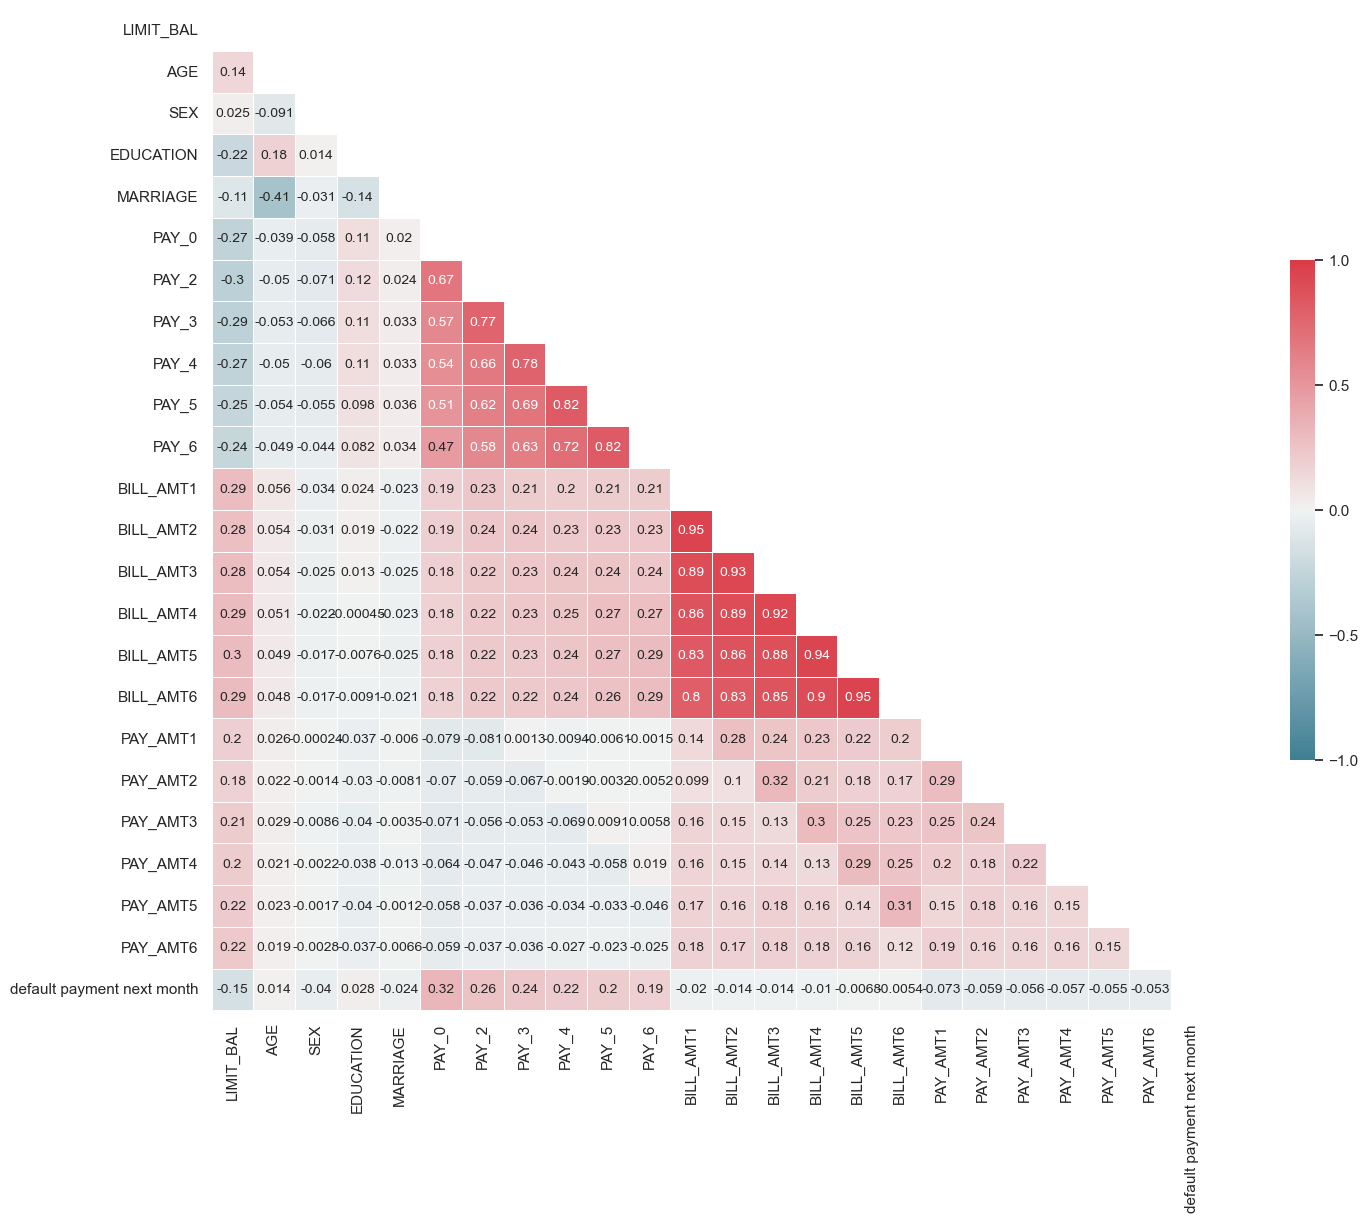

In [20]:
sns.set(style="white", font_scale=1)
numeric = ['LIMIT_BAL','AGE','SEX','EDUCATION','MARRIAGE',
           'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
           'BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
           'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','default payment next month']
corr = default[numeric].corr() # .corr is used to find corelation

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10})
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])
plt.savefig('Fig - Correlation matrix by means of the Pearson’s coefficient for all feature pairs.png')

Insights:-
    
As we can see that our dataset has  large numbers of features so this hetamap correlation matrix only shows the 
lower diagonal matrix for better visualiztions. 
 
As from this hetamap we can see that 

1-BILL_AMT2 and BILL_AMT1 has a high correlation 0.95

2-BILL_AMT5 and BILL_AMT4 has a correlation of 0.94

3-BILL_AMT5 and BILL_AMT6 has a correlation of 0.95.


We can also see that default payment next month is highly correlated with PAY_0 followed by PAY_2, PAY_3 and so on. It means the more the repayment status in the more chances that customer is going to do default next month.


## Finding Outliers

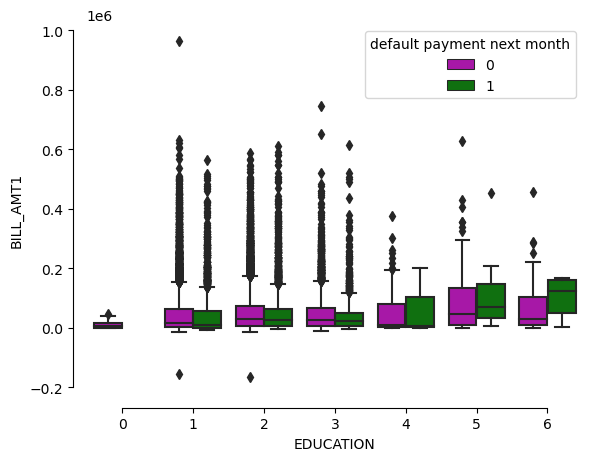

In [111]:
# Draw a nested boxplot to show if there is any outliers.
sns.boxplot(x="EDUCATION", y="BILL_AMT1",
            hue="default payment next month", palette=["m", "g"],
            data=default)
sns.despine(offset=10, trim=True)

#### 
As from the above we can see boxplot we can see that there is not much outliers so we can leave our data as it is.


#### How  does it cost bank for per default?

In [34]:
default_summ=default[default['default payment next month'] == 1] \
        .groupby(['default payment next month']) \
        .agg({'BILL_AMT1':['sum','count']}) \
        
default_summ.columns=['Total Sept Bill Amount','Count of Default']
default_summ['Amount per default']=default_summ['Total Sept Bill Amount'] / default_summ['Count of Default']

In [35]:
default_summ

,Total Sept Bill Amount,Count of Default,Amount per default
default payment next month,,,
1,321906801,6636,48509.162297


### It cost 48.5k Taiwan dollars for every default .